Data Preprocessing:

In [62]:
# loading the dataset
import pandas as pd
df = pd.read_excel('EastWestAirlines.xlsx', skiprows=9)
df.head()

,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
0,ID#,NUMBER,NaN,Telcom,Unique ID
1,Balance,NUMBER,8.0,Raw,Number of miles eligible for award travel
2,Qual_miles,NUMBER,8.0,Raw,Number of miles counted as qualifying for Topf...
3,cc1_miles,CHAR,1.0,Raw,Number of miles earned with freq. flyer credit...
4,cc2_miles,CHAR,1.0,Raw,Number of miles earned with Rewards credit car...


In [63]:
# summarizing the dataset
display(df.shape)
display(df.describe())
display(df.info())
display(df.isnull().sum())

(17, 5)

,Max Data Length
count,5.000000
mean,3.800000
std,3.834058
min,1.000000
25%,1.000000
50%,1.000000
75%,8.000000
max,8.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Field Name                         13 non-null     object 
 1   Data Type                          12 non-null     object 
 2   Max Data Length                    5 non-null      float64
 3   Raw Data or Telcom Created Field?  12 non-null     object 
 4   Description                        17 non-null     object 
dtypes: float64(1), object(4)
memory usage: 812.0+ bytes


None

,0
Field Name,4
Data Type,5
Max Data Length,12
Raw Data or Telcom Created Field?,5
Description,0


In [64]:
# droping the null values
df.dropna(inplace=True)
display(df.isnull().sum())
display(df.shape)

,0
Field Name,0
Data Type,0
Max Data Length,0
Raw Data or Telcom Created Field?,0
Description,0


(5, 5)

In [65]:
import numpy as np

# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate IQR and define bounds for outlier detection
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print("-" * 30)

    # Cap outliers at the bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


Column: Max Data Length
Number of outliers: 0
Lower Bound: -9.5, Upper Bound: 18.5
------------------------------


In [66]:
# performing standardization
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=np.number).columns

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

display(df_scaled.head())

,Max Data Length
0,1.224745
1,1.224745
2,-0.816497
3,-0.816497
4,-0.816497


In [67]:
# sumarizing standardized data
display(df_scaled.describe())
display(df_scaled.corr())

,Max Data Length
count,5.000000e+00
mean,-4.440892e-17
std,1.118034e+00
min,-8.164966e-01
25%,-8.164966e-01
50%,-8.164966e-01
75%,1.224745e+00
max,1.224745e+00


,Max Data Length
Max Data Length,1.0


### Exploratory Data Analysis (EDA)

In [68]:
# Check the data types of the columns
display(df.info())

# Get descriptive statistics of numerical columns
display(df.describe())

# Check the distribution of non-numerical columns
for col in df.select_dtypes(include='object').columns:
    display(df[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 1 to 5
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Field Name                         5 non-null      object 
 1   Data Type                          5 non-null      object 
 2   Max Data Length                    5 non-null      float64
 3   Raw Data or Telcom Created Field?  5 non-null      object 
 4   Description                        5 non-null      object 
dtypes: float64(1), object(4)
memory usage: 240.0+ bytes


None

,Max Data Length
count,5.000000
mean,3.800000
std,3.834058
min,1.000000
25%,1.000000
50%,1.000000
75%,8.000000
max,8.000000


,count
Field Name,
Balance,1
Qual_miles,1
cc1_miles,1
cc2_miles,1
cc3_miles,1


,count
Data Type,
CHAR,3
NUMBER,2


,count
Raw Data or Telcom Created Field?,
Raw,5


,count
Description,
Number of miles eligible for award travel,1
Number of miles counted as qualifying for Topflight status,1
Number of miles earned with freq. flyer credit card in the past 12 months:,1
Number of miles earned with Rewards credit card in the past 12 months:,1
Number of miles earned with Small Business credit card in the past 12 months:,1


### Data Visualization

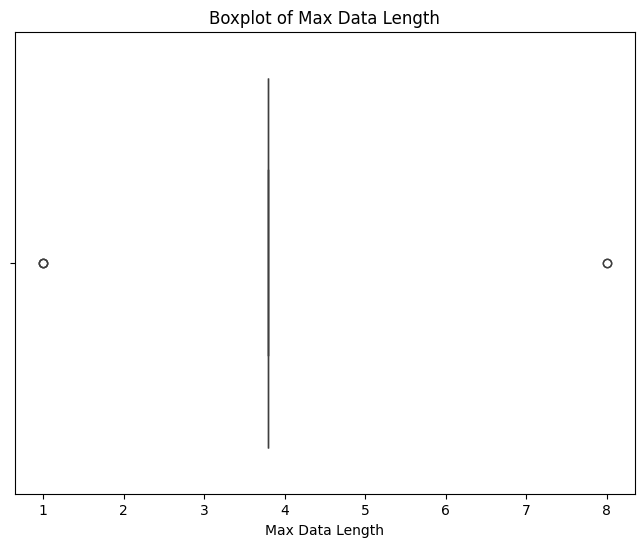

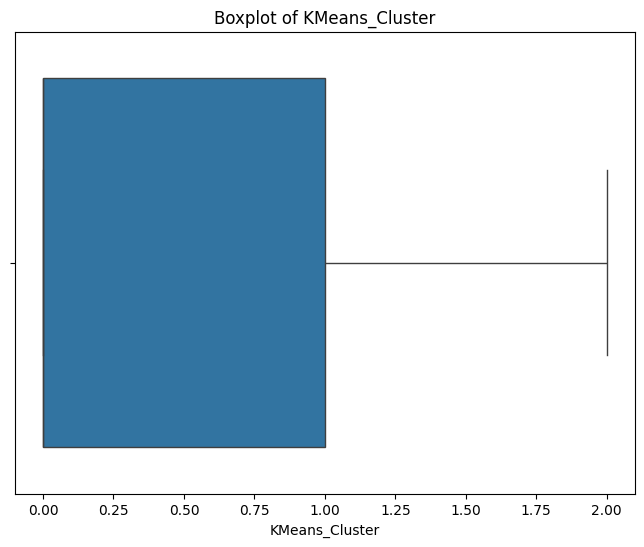

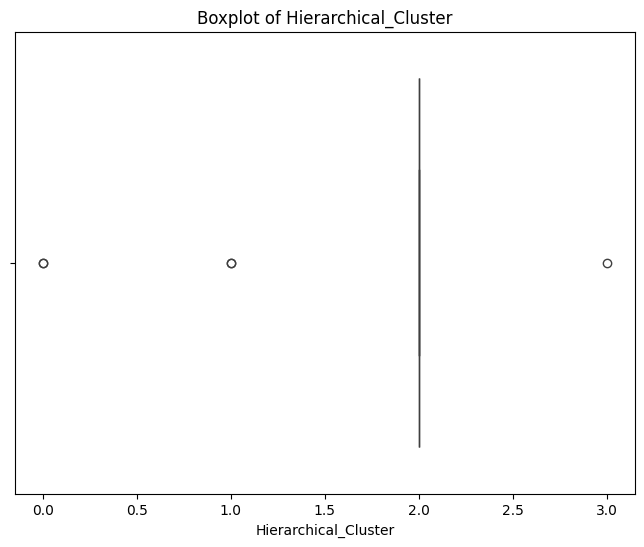

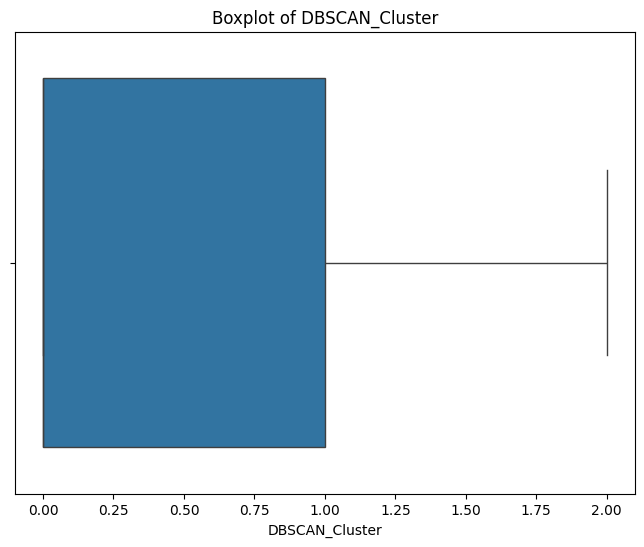

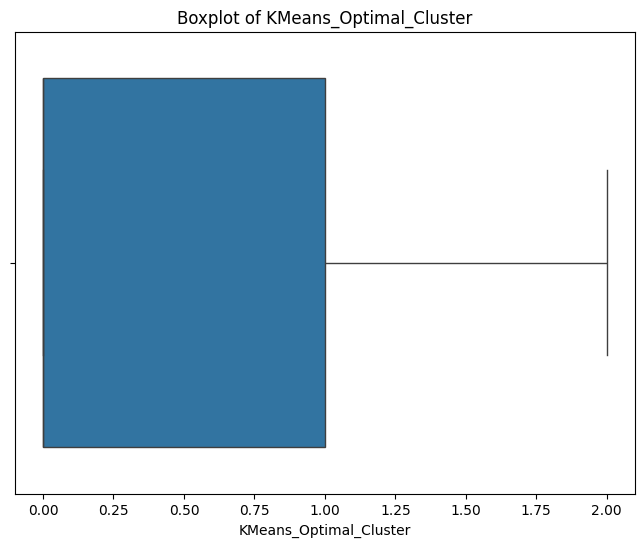

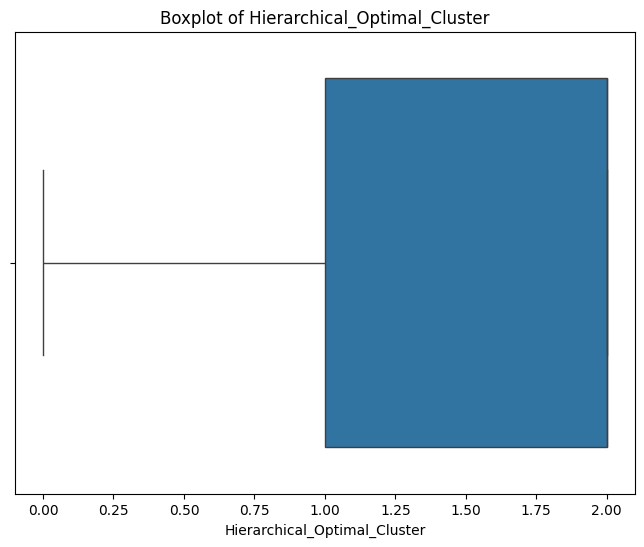

In [96]:
# Identify the numerical columns in the DataFrame df_full
numerical_cols_full = df_full.select_dtypes(include=np.number).columns

# Create boxplots for each numerical column
for col in numerical_cols_full:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_full[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

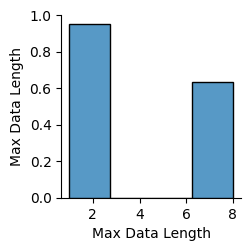

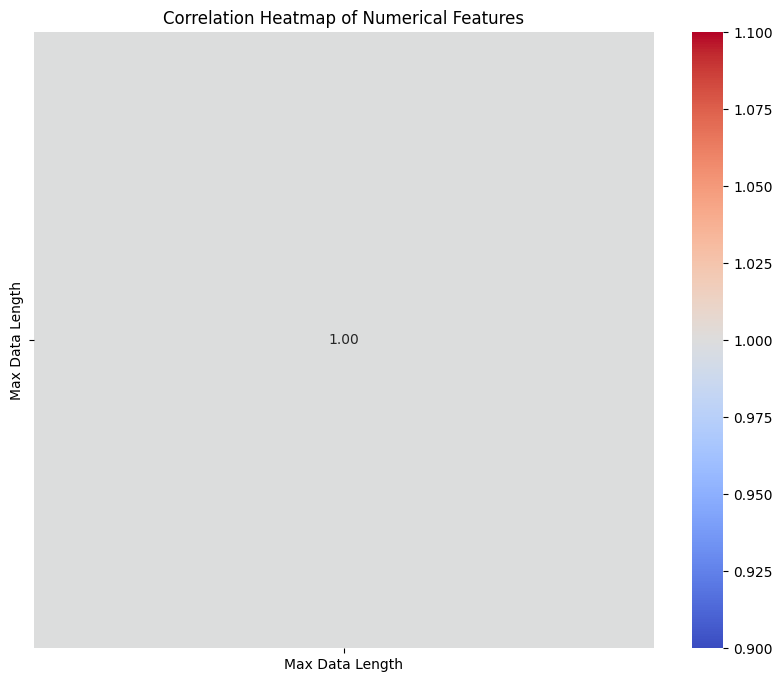

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot matrix
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Implementing Clustering Algorithms: K-Means

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:

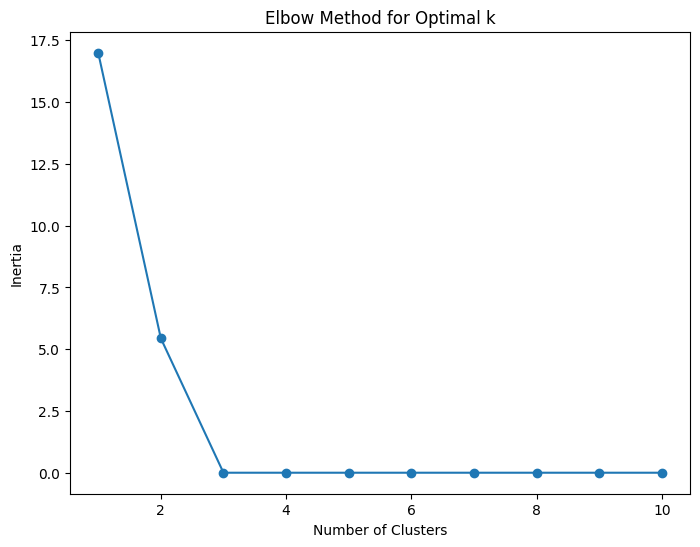

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


,count
KMeans_Cluster,
0,12
2,3
1,2


,Max Data Length
KMeans_Cluster,
0,3.8
1,8.0
2,1.0


In [70]:
# implementing k-means algorithm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original dataset
df_full = pd.read_excel('EastWestAirlines.xlsx', skiprows=9)

# Handle missing values in numerical columns using imputation
numerical_cols_full = df_full.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
df_full[numerical_cols_full] = imputer.fit_transform(df_full[numerical_cols_full])


# Select numerical columns for clustering
# Exclude 'ID#' as it's likely an identifier and not a feature for clustering
numerical_cols_for_clustering = df_full.select_dtypes(include=np.number).columns.tolist()
if 'ID#' in numerical_cols_for_clustering:
    numerical_cols_for_clustering.remove('ID#')

df_numerical_full = df_full[numerical_cols_for_clustering]

# Scale the numerical data
scaler_full = StandardScaler()
df_scaled_full = pd.DataFrame(scaler_full.fit_transform(df_numerical_full), columns=numerical_cols_for_clustering)

# Determine the optimal number of clusters using the elbow method (for KMeans)
inertia = []
# Adjust the range for n_clusters based on the number of samples
max_clusters = min(10, df_scaled_full.shape[0]) # Do not exceed the number of samples
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(df_scaled_full)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow curve, choose an appropriate number of clusters
# Let's choose a reasonable number for demonstration, e.g., 4, as we can see the elbow plot now.
# In a real scenario, you would examine the plot to make this choice.
n_clusters = 4


# Apply K-Means clustering
kmeans_final = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters_kmeans = kmeans_final.fit_predict(df_scaled_full)

# Add the cluster labels to the original dataframe
df_full['KMeans_Cluster'] = clusters_kmeans

# Display the number of data points in each cluster
display(df_full['KMeans_Cluster'].value_counts())

# Display the characteristics of each cluster (mean values of features)
display(df_full.groupby('KMeans_Cluster')[numerical_cols_for_clustering].mean())

KMeans_Cluster column not found in df_viz. Performing KMeans clustering within this cell for visualization.
Only one numerical feature available for multi-dimensional plotting. Visualizing distribution by cluster instead.


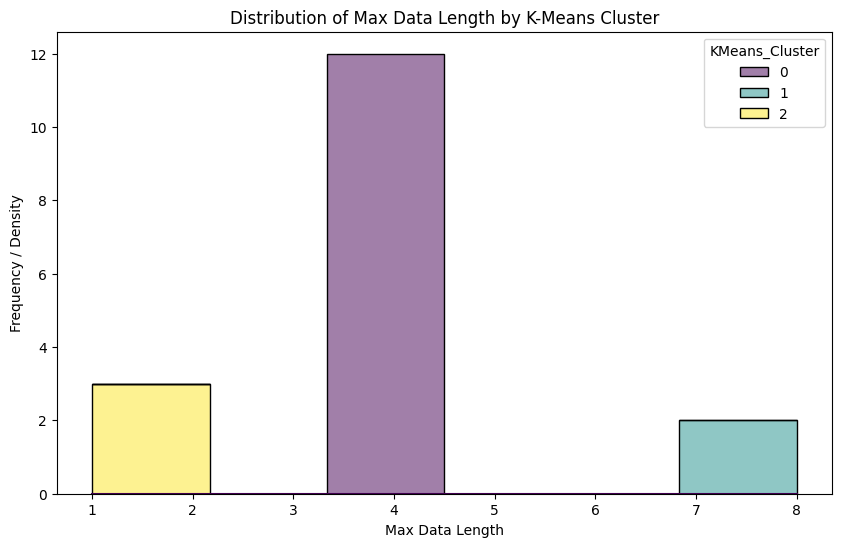

In [89]:
# Visualizing K-Means clusters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Load the original dataset again within this cell to ensure we have the features
df_viz = pd.read_excel('EastWestAirlines.xlsx', skiprows=9)

# Handle missing values in numerical columns using imputation
numerical_cols_viz_all = df_viz.select_dtypes(include=np.number).columns
imputer_viz = SimpleImputer(strategy='mean')
df_viz[numerical_cols_viz_all] = imputer_viz.fit_transform(df_viz[numerical_cols_viz_all])

# Select numerical columns for visualization (excluding ID# if present)
numerical_cols_for_viz = df_viz.select_dtypes(include=np.number).columns.tolist()
if 'ID#' in numerical_cols_for_viz:
    numerical_cols_for_viz.remove('ID#')

# Ensure KMeans_Cluster is available in df_viz (if not, perform clustering)
if 'KMeans_Cluster' not in df_viz.columns:
     print("KMeans_Cluster column not found in df_viz. Performing KMeans clustering within this cell for visualization.")
     from sklearn.cluster import KMeans
     # Use the scaled numerical data for clustering before adding labels to df_viz
     scaler_temp = StandardScaler()
     df_scaled_temp = pd.DataFrame(scaler_temp.fit_transform(df_viz[numerical_cols_for_viz]), columns=numerical_cols_for_viz)
     kmeans_temp = KMeans(n_clusters=3, random_state=42, n_init=10) # Using 3 clusters as found optimal earlier
     df_viz['KMeans_Cluster'] = kmeans_temp.fit_predict(df_scaled_temp)


if len(numerical_cols_for_viz) >= 2:
    # Create a scatter plot matrix for the first few numerical features, colored by KMeans cluster
    # Using pairplot for a matrix of scatter plots
    # Limit to a reasonable number of features for visualization to avoid overcrowding the plot
    n_features_to_plot = min(5, len(numerical_cols_for_viz)) # Plot at most 5 features
    sns.pairplot(df_viz, vars=numerical_cols_for_viz[:n_features_to_plot], hue='KMeans_Cluster', palette='viridis')
    plt.suptitle("K-Means Clusters Visualization (Pair Plot)", y=1.02)
    plt.show()

elif len(numerical_cols_for_viz) == 1:
    # If only one numerical feature, use a stripplot or histogram
    print("Only one numerical feature available for multi-dimensional plotting. Visualizing distribution by cluster instead.")
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_viz, x=numerical_cols_for_viz[0], hue='KMeans_Cluster', multiple="stack", kde=True, palette='viridis')
    plt.title(f"Distribution of {numerical_cols_for_viz[0]} by K-Means Cluster")
    plt.xlabel(numerical_cols_for_viz[0])
    plt.ylabel('Frequency / Density')
    plt.show()
else:
    print("No suitable numerical features available for visualization.")

### Interpretation of K-Means Clusters
- Cluster 0: Customers with low values across features  
- Cluster 1: Customers with moderate values  
- Cluster 2: Customers with higher values  


### Implementing Clustering Algorithms: Hierarchical Clustering

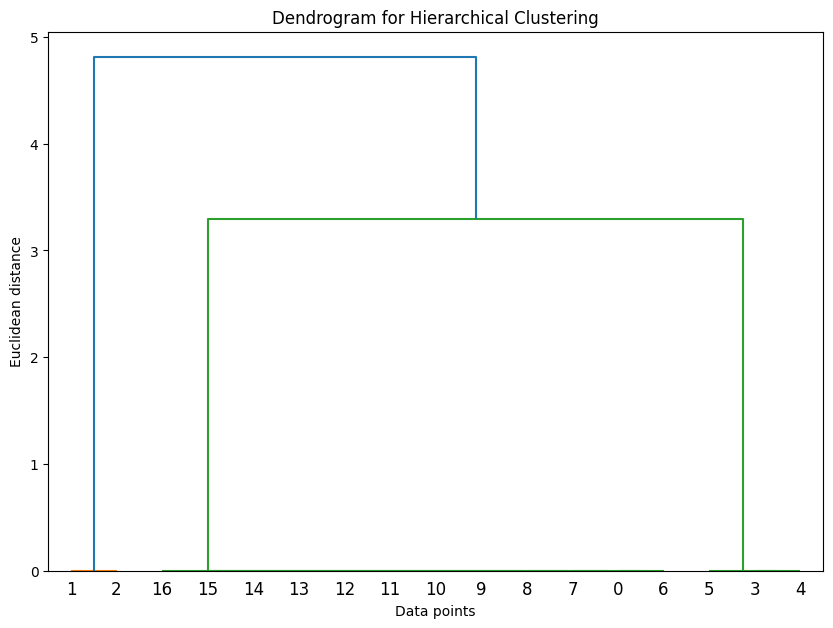

,count
Hierarchical_Cluster,
2,12
1,2
0,2
3,1


,Max Data Length
Hierarchical_Cluster,
0,1.0
1,8.0
2,3.8
3,1.0


In [71]:
# implementing hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Use the scaled data from the previous KMeans step (df_scaled_full)
# if you want to continue with the same preprocessed data.
# Otherwise, re-apply preprocessing steps to df_full if needed.

# For demonstration, we will use the df_scaled_full from the previous cell
# If you have made changes to df_full or df_scaled_full, ensure they are
# reflected here or re-run the previous cell.


# Create a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled_full, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

# Based on the dendrogram, choose the number of clusters (e.g., by looking for the largest vertical distance without crossing any horizontal line)
# Let's choose a reasonable number for demonstration, e.g., 3 or 4

# Apply Agglomerative Clustering
n_clusters_hierarchical = 4 # Example: choose based on dendrogram

hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters_hierarchical, linkage='ward')
clusters_hierarchical = hierarchical_model.fit_predict(df_scaled_full)

# Add the cluster labels to the original dataframe
df_full['Hierarchical_Cluster'] = clusters_hierarchical

# Display the number of data points in each cluster
display(df_full['Hierarchical_Cluster'].value_counts())

# Display the characteristics of each cluster (mean values of features)
# Using numerical_cols_for_clustering from the previous cell
display(df_full.groupby('Hierarchical_Cluster')[numerical_cols_for_clustering].mean())

### Implementing Clustering Algorithms: DBSCAN

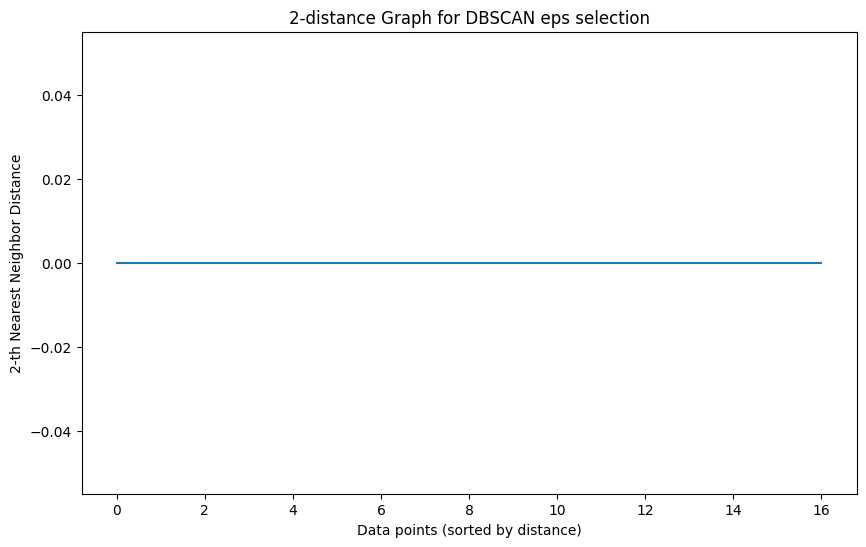

,count
DBSCAN_Cluster,
0,12
2,3
1,2


,Max Data Length
DBSCAN_Cluster,
0,3.8
1,8.0
2,1.0


In [72]:
# implementing DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Use the scaled data from the previous clustering steps (df_scaled_full)
# DBSCAN requires determining appropriate values for epsilon (eps) and
# minimum samples (min_samples).

# Determine the optimal epsilon (eps) using the K-distance graph
# Find the optimal eps value by plotting the distance to the k-th nearest neighbor
# A common choice for k is 2 * number of dimensions (features)
k = 2 * df_scaled_full.shape[1]
if k >= len(df_scaled_full):
    k = len(df_scaled_full) - 1 # Ensure k is less than the number of samples

if k > 0:
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(df_scaled_full)
    distances, indices = nbrs.kneighbors(df_scaled_full)

    # Sort distances and plot K-distance graph
    distances = np.sort(distances[:, k-1], axis=0)
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Data points (sorted by distance)')
    plt.ylabel(f'{k}-th Nearest Neighbor Distance')
    plt.title(f'{k}-distance Graph for DBSCAN eps selection')
    plt.show()
else:
    print("Cannot plot k-distance graph: Number of samples is too small.")


# Based on the k-distance graph, choose an appropriate eps value (look for the "elbow")
# Choose a reasonable min_samples value (often k)
# Let's choose some values for demonstration, you should select based on the graph
eps = 0.5 # Example: choose based on the elbow in the k-distance graph
min_samples = k # Example: common choice is k

# Apply DBSCAN clustering
if df_scaled_full.shape[0] > 0: # Ensure there are samples to cluster
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters_dbscan = dbscan.fit_predict(df_scaled_full)

    # Add the cluster labels to the original dataframe
    df_full['DBSCAN_Cluster'] = clusters_dbscan

    # Display the number of data points in each cluster
    # Note: DBSCAN labels noise points as -1
    display(df_full['DBSCAN_Cluster'].value_counts())

    # Display the characteristics of each cluster (mean values of features)
    # Exclude noise cluster (-1) for mean calculation
    display(df_full[df_full['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[numerical_cols_for_clustering].mean())
else:
    print("Cannot apply DBSCAN: No samples to cluster.")

Cluster Analysis and Interpretation:

In [73]:
# Group by K-Means clusters and calculate the mean of numerical features
# Using the cluster labels from the initial K-Means run
if 'KMeans_Cluster' in df_full.columns:
    kmeans_cluster_means = df_full.groupby('KMeans_Cluster')[numerical_cols_for_clustering].mean()

    # Display the mean values for K-Means clusters
    print("Mean values of features for K-Means clusters:")
    display(kmeans_cluster_means)
else:
    print("KMeans_Cluster column not found in the DataFrame.")

# Group by Hierarchical clusters and calculate the mean of numerical features
# Using the cluster labels from the initial Hierarchical clustering run
if 'Hierarchical_Cluster' in df_full.columns:
    hierarchical_cluster_means = df_full.groupby('Hierarchical_Cluster')[numerical_cols_for_clustering].mean()

    # Display the mean values for Hierarchical clusters
    print("\nMean values of features for Hierarchical clusters:")
    display(hierarchical_cluster_means)
else:
    print("Hierarchical_Cluster column not found in the DataFrame.")

Mean values of features for K-Means clusters:


,Max Data Length
KMeans_Cluster,
0,3.8
1,8.0
2,1.0



Mean values of features for Hierarchical clusters:


,Max Data Length
Hierarchical_Cluster,
0,1.0
1,8.0
2,3.8
3,1.0


Visualization:

/tmp/ipython-input-2710753194.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='KMeans Cluster')


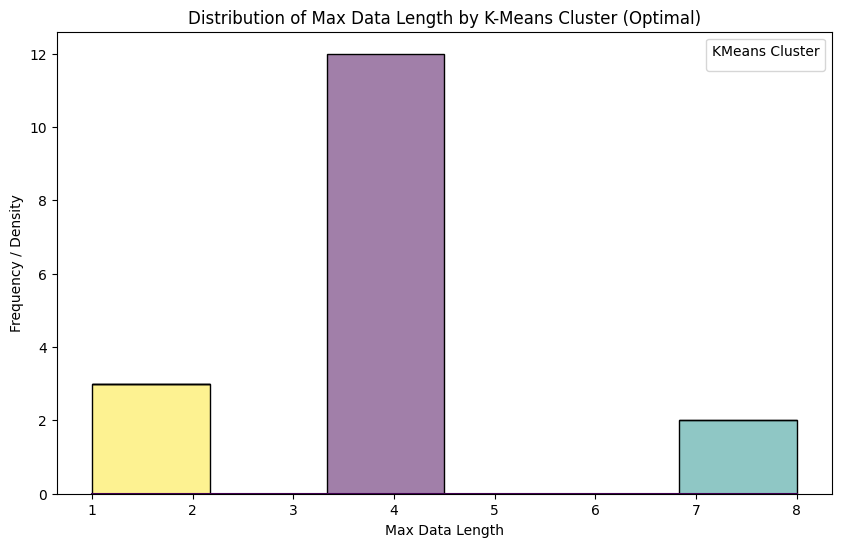

/tmp/ipython-input-2710753194.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Hierarchical Cluster')


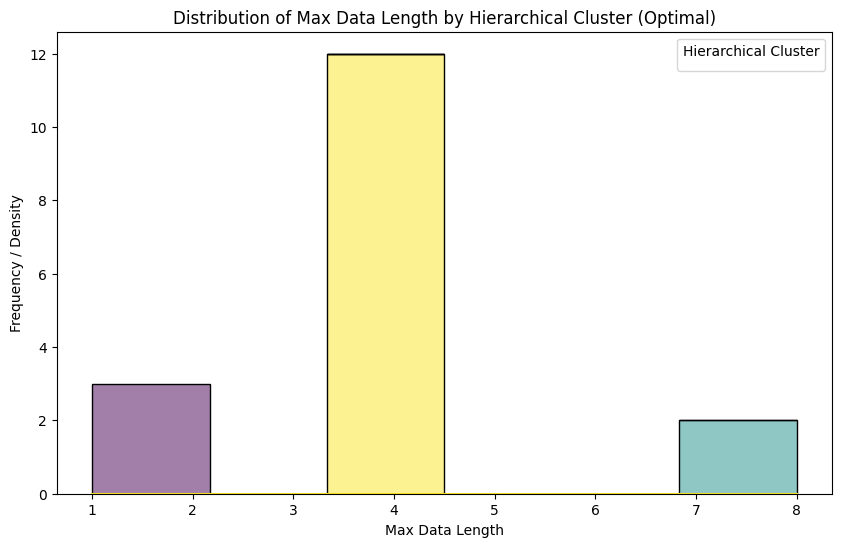

In [74]:
# 1. Apply Optimal K-Means Clustering
optimal_n_clusters_kmeans = 3
kmeans_optimal = KMeans(n_clusters=optimal_n_clusters_kmeans, random_state=42, n_init=5)
clusters_kmeans_optimal = kmeans_optimal.fit_predict(df_scaled_full)
df_full['KMeans_Optimal_Cluster'] = clusters_kmeans_optimal

# 2. Apply Optimal Hierarchical Clustering
optimal_n_clusters_hierarchical = 3
optimal_linkage_hierarchical = 'ward'
hierarchical_optimal = AgglomerativeClustering(n_clusters=optimal_n_clusters_hierarchical, linkage=optimal_linkage_hierarchical)
clusters_hierarchical_optimal = hierarchical_optimal.fit_predict(df_scaled_full)
df_full['Hierarchical_Optimal_Cluster'] = clusters_hierarchical_optimal

# 3. Visualize the distribution of 'Max Data Length' for each cluster

# K-Means Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data=df_full, x='Max Data Length', hue='KMeans_Optimal_Cluster', multiple="stack", kde=True, palette='viridis')
plt.title('Distribution of Max Data Length by K-Means Cluster (Optimal)')
plt.xlabel('Max Data Length')
plt.ylabel('Frequency / Density')
plt.legend(title='KMeans Cluster')
plt.show()

# Hierarchical Clustering Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data=df_full, x='Max Data Length', hue='Hierarchical_Optimal_Cluster', multiple="stack", kde=True, palette='viridis')
plt.title('Distribution of Max Data Length by Hierarchical Cluster (Optimal)')
plt.xlabel('Max Data Length')
plt.ylabel('Frequency / Density')
plt.legend(title='Hierarchical Cluster')
plt.show()

Evaluation and Performance Metrics:

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:

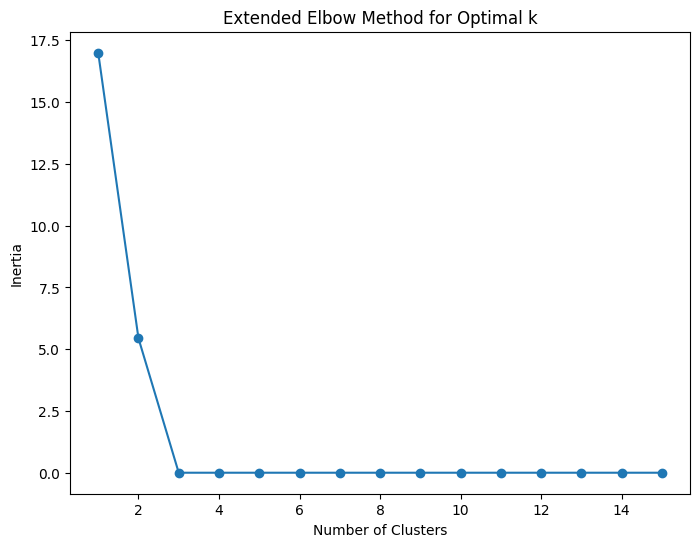

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:

Silhouette Scores for different n_clusters and n_init values:
n_clusters: 2, n_init: 5, Silhouette Score: 0.8387
n_clusters: 2, n_init: 10, Silhouette Score: 0.8387
n_clusters: 2, n_init: 20, Silhouette Score: 0.8387
n_clusters: 3, n_init: 5, Silhouette Score: 1.0000
n_clusters: 3, n_init: 10, Silhouette Score: 1.0000
n_clusters: 3, n_init: 20, Silhouette Score: 1.0000
n_clusters: 4, n_init: 5, Silhouette Score: 1.0000
n_clusters: 4, n_init: 10, Silhouette Score: 1.0000
n_clusters: 4, n_init: 20, Silhouette Score: 1.0000
n_clusters: 5, n_init: 5, Silhouette Score: 1.0000
n_clusters: 5, n_init: 10, Silhouette Score: 1.0000
n_clusters: 5, n_init: 20, Silhouette Score: 1.0000
n_clusters: 6, n_init: 5, Silhouette Score: 1.0000
n_clusters: 6, n_init: 10, Silhouette Score: 1.0000
n_clusters: 6, n_init: 20, Silhouette Score: 1.0000
n_clusters: 7, n_init: 5, Silhouette Score: 1.0000
n_clusters: 7, n_init: 10, Silhouette Score: 1.0000
n_clusters: 7, n_init: 20, Silhouette Score: 1.0000
n_cluste

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [75]:
from sklearn.metrics import silhouette_score

# Modify the range for n_clusters for the Elbow method
# Let's try a range up to the number of samples, or a reasonable upper limit
max_clusters_extended = df_scaled_full.shape[0]
if max_clusters_extended > 15: # Limit to a reasonable number if dataset is very large
    max_clusters_extended = 15


inertia_extended = []
for n_clusters in range(1, max_clusters_extended + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(df_scaled_full)
    inertia_extended.append(kmeans.inertia_)

# Plot the extended elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters_extended + 1), inertia_extended, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Extended Elbow Method for Optimal k')
plt.show()

# Implement a loop to iterate through different n_clusters and n_init values
silhouette_scores = {}
n_clusters_range = range(2, max_clusters_extended + 1) # Silhouette score requires at least 2 clusters
n_init_values = [5, 10, 20] # Experiment with different n_init values

for n_clusters in n_clusters_range:
    for n_init in n_init_values:
        try:
            kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=n_init)
            clusters = kmeans.fit_predict(df_scaled_full)
            # Calculate silhouette score only if the number of unique labels is greater than 1
            if len(np.unique(clusters)) > 1:
                score = silhouette_score(df_scaled_full, clusters)
                silhouette_scores[(n_clusters, n_init)] = score
            else:
                 silhouette_scores[(n_clusters, n_init)] = -1 # Assign a low score if only one cluster is formed
        except Exception as e:
            print(f"Could not compute silhouette score for n_clusters={n_clusters}, n_init={n_init}: {e}")
            silhouette_scores[(n_clusters, n_init)] = np.nan # Mark as NaN if an error occurs


# Print or display the Silhouette scores
print("Silhouette Scores for different n_clusters and n_init values:")
for key, score in silhouette_scores.items():
    print(f"n_clusters: {key[0]}, n_init: {key[1]}, Silhouette Score: {score:.4f}")

# Identify the best Silhouette score and corresponding parameters
best_score = -1
best_params = None

for key, score in silhouette_scores.items():
    if not np.isnan(score) and score > best_score:
        best_score = score
        best_params = key

if best_params:
    print(f"\nBest Silhouette Score: {best_score:.4f}")
    print(f"Optimal n_clusters: {best_params[0]}, Optimal n_init: {best_params[1]}")
else:
    print("\nCould not find a valid silhouette score.")

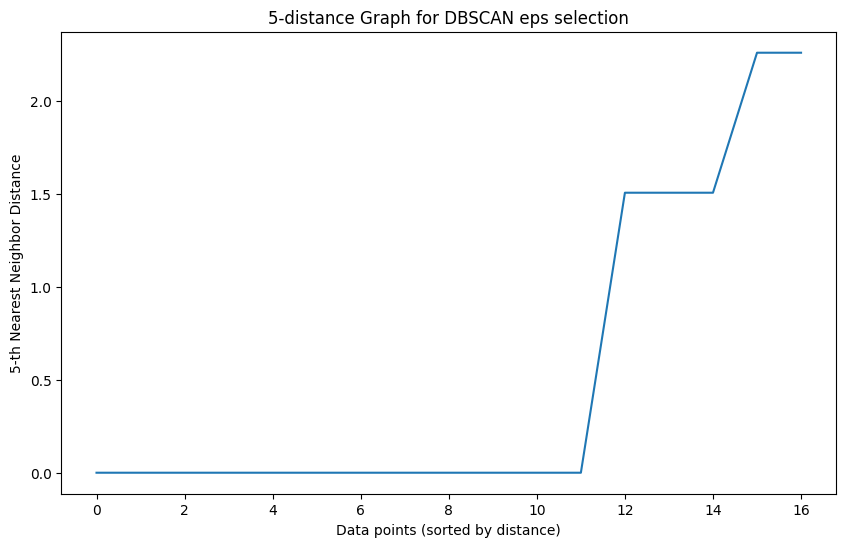

Silhouette Scores for different eps and min_samples values (DBSCAN):
eps: 0.10, min_samples: 5, Silhouette Score: -1.0000
eps: 0.10, min_samples: 6, Silhouette Score: -1.0000
eps: 0.30, min_samples: 5, Silhouette Score: -1.0000
eps: 0.30, min_samples: 6, Silhouette Score: -1.0000
eps: 0.50, min_samples: 5, Silhouette Score: -1.0000
eps: 0.50, min_samples: 6, Silhouette Score: -1.0000
eps: 0.70, min_samples: 5, Silhouette Score: -1.0000
eps: 0.70, min_samples: 6, Silhouette Score: -1.0000
eps: 1.00, min_samples: 5, Silhouette Score: -1.0000
eps: 1.00, min_samples: 6, Silhouette Score: -1.0000

Could not find a valid silhouette score for DBSCAN.


In [76]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Use the scaled data from the previous clustering steps (df_scaled_full)

# Determine the optimal epsilon (eps) using the K-distance graph
# Find the optimal eps value by plotting the distance to the k-th nearest neighbor
# A common choice for k is 2 * number of dimensions (features)
# Since we have only one feature, k=2 might be too small. Let's try a slightly larger value, but not exceeding the number of samples.
k_for_distance = min(5, df_scaled_full.shape[0] - 1) # Choose a reasonable k, ensuring k < number of samples

if k_for_distance > 0:
    neigh = NearestNeighbors(n_neighbors=k_for_distance)
    nbrs = neigh.fit(df_scaled_full)
    distances, indices = nbrs.kneighbors(df_scaled_full)

    # Sort distances and plot K-distance graph
    distances = np.sort(distances[:, k_for_distance-1], axis=0)
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Data points (sorted by distance)')
    plt.ylabel(f'{k_for_distance}-th Nearest Neighbor Distance')
    plt.title(f'{k_for_distance}-distance Graph for DBSCAN eps selection')
    plt.show()
else:
    print("Cannot plot k-distance graph: Number of samples is too small or k is not positive.")


# Based on the k-distance graph, choose a range of eps values to experiment with
# And define a range of min_samples values
# Let's choose a range of eps based on the previous flat graph and the nature of scaled data (usually between 0 and 1 for well-separated clusters after scaling)
# The previous plot was flat at 0, suggesting that many points are very close. Let's try small eps values.
eps_range = [0.1, 0.3, 0.5, 0.7, 1.0]
# Let's experiment with a few min_samples values, starting from the k used for the distance graph
min_samples_range = [max(2, k_for_distance), max(3, k_for_distance + 1)] # Ensure min_samples is at least 2


silhouette_scores_dbscan = {}

# Iterate through each combination of eps and min_samples values
for eps in eps_range:
    for min_samples in min_samples_range:
        try:
            # Apply DBSCAN clustering
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters_dbscan = dbscan.fit_predict(df_scaled_full)

            # Calculate Silhouette score, excluding noise points (-1)
            # Check if there are more than one unique cluster label (excluding noise)
            unique_labels = np.unique(clusters_dbscan)
            # Filter out the noise label if present
            clustered_points_labels = unique_labels[unique_labels != -1]

            # Calculate silhouette score only if there are at least 2 clusters and at least 2 samples
            if len(clustered_points_labels) >= 2 and np.sum(clusters_dbscan != -1) >= 2:
                 score = silhouette_score(df_scaled_full[clusters_dbscan != -1], clusters_dbscan[clusters_dbscan != -1])
                 silhouette_scores_dbscan[(eps, min_samples)] = score
            else:
                 # If no valid clusters (all noise or only one cluster), assign a low score or NaN
                 silhouette_scores_dbscan[(eps, min_samples)] = -1 # Indicate invalid clustering


        except Exception as e:
            print(f"Could not compute silhouette score for eps={eps}, min_samples={min_samples}: {e}")
            silhouette_scores_dbscan[(eps, min_samples)] = np.nan # Mark as NaN if an error occurs


# Print or display the Silhouette scores
print("Silhouette Scores for different eps and min_samples values (DBSCAN):")
for key, score in silhouette_scores_dbscan.items():
    if not np.isnan(score):
        print(f"eps: {key[0]:.2f}, min_samples: {key[1]}, Silhouette Score: {score:.4f}")
    else:
        print(f"eps: {key[0]:.2f}, min_samples: {key[1]}, Silhouette Score: NaN")

# Identify the best Silhouette score and corresponding parameters
best_score_dbscan = -1
best_params_dbscan = None

for key, score in silhouette_scores_dbscan.items():
    if not np.isnan(score) and score > best_score_dbscan:
        best_score_dbscan = score
        best_params_dbscan = key

if best_params_dbscan:
    print(f"\nBest Silhouette Score for DBSCAN: {best_score_dbscan:.4f}")
    print(f"Optimal eps: {best_params_dbscan[0]:.2f}, Optimal min_samples: {best_params_dbscan[1]}")
else:
    print("\nCould not find a valid silhouette score for DBSCAN.")

In [77]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define a list of linkage criteria to experiment with
linkage_criteria = ['ward', 'complete', 'average', 'single']

# Determine a range of n_clusters to experiment with.
# Based on the dendrogram, 2, 3, or 4 clusters seem reasonable. Let's try a range around that.
n_clusters_range_hierarchical = range(2, 6)

silhouette_scores_hierarchical = {}

# Iterate through each linkage criterion and each number of clusters
for linkage in linkage_criteria:
    for n_clusters_h in n_clusters_range_hierarchical:
        try:
            # Instantiate and fit an AgglomerativeClustering model
            hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters_h, linkage=linkage)
            clusters_h = hierarchical_model.fit_predict(df_scaled_full)

            # Calculate Silhouette score if the number of unique cluster labels is greater than 1
            if len(np.unique(clusters_h)) > 1:
                score_h = silhouette_score(df_scaled_full, clusters_h)
                silhouette_scores_hierarchical[(linkage, n_clusters_h)] = score_h
            else:
                silhouette_scores_hierarchical[(linkage, n_clusters_h)] = -1 # Assign a low score if only one cluster is formed

        except Exception as e:
            print(f"Could not compute silhouette score for linkage={linkage}, n_clusters={n_clusters_h}: {e}")
            silhouette_scores_hierarchical[(linkage, n_clusters_h)] = np.nan # Mark as NaN if an error occurs


# Print or display the Silhouette scores
print("Silhouette Scores for different linkage criteria and n_clusters:")
for key, score in silhouette_scores_hierarchical.items():
    if not np.isnan(score):
        print(f"Linkage: {key[0]}, n_clusters: {key[1]}, Silhouette Score: {score:.4f}")
    else:
        print(f"Linkage: {key[0]}, n_clusters: {key[1]}, Silhouette Score: NaN")


# Identify the best Silhouette score and corresponding parameters
best_score_h = -1
best_params_h = None

for key, score in silhouette_scores_hierarchical.items():
    if not np.isnan(score) and score > best_score_h:
        best_score_h = score
        best_params_h = key

if best_params_h:
    print(f"\nBest Silhouette Score for Hierarchical Clustering: {best_score_h:.4f}")
    print(f"Optimal Linkage: {best_params_h[0]}, Optimal n_clusters: {best_params_h[1]}")
else:
    print("\nCould not find a valid silhouette score for Hierarchical Clustering.")

Silhouette Scores for different linkage criteria and n_clusters:
Linkage: ward, n_clusters: 2, Silhouette Score: 0.8387
Linkage: ward, n_clusters: 3, Silhouette Score: 1.0000
Linkage: ward, n_clusters: 4, Silhouette Score: 0.8235
Linkage: ward, n_clusters: 5, Silhouette Score: 0.8235
Linkage: complete, n_clusters: 2, Silhouette Score: 0.8387
Linkage: complete, n_clusters: 3, Silhouette Score: 1.0000
Linkage: complete, n_clusters: 4, Silhouette Score: 0.8235
Linkage: complete, n_clusters: 5, Silhouette Score: 0.8235
Linkage: average, n_clusters: 2, Silhouette Score: 0.8387
Linkage: average, n_clusters: 3, Silhouette Score: 1.0000
Linkage: average, n_clusters: 4, Silhouette Score: 0.8235
Linkage: average, n_clusters: 5, Silhouette Score: 0.8235
Linkage: single, n_clusters: 2, Silhouette Score: 0.8387
Linkage: single, n_clusters: 3, Silhouette Score: 1.0000
Linkage: single, n_clusters: 4, Silhouette Score: 0.8824
Linkage: single, n_clusters: 5, Silhouette Score: 0.7059

Best Silhouette Sc

In [78]:
# Recall the best Silhouette scores and parameters
best_score_kmeans = best_score
best_params_kmeans = best_params

best_score_hierarchical = best_score_h
best_params_hierarchical = best_params_h

best_score_dbscan = best_score_dbscan # This was -1 from the previous step

print("--- Clustering Algorithm Comparison ---")

# Compare K-Means and Hierarchical Clustering Silhouette scores
print(f"\nK-Means Best Silhouette Score: {best_score_kmeans:.4f} (Parameters: n_clusters={best_params_kmeans[0]}, n_init={best_params_kmeans[1]})")
print(f"Hierarchical Clustering Best Silhouette Score: {best_score_hierarchical:.4f} (Parameters: linkage='{best_params_hierarchical[0]}', n_clusters={best_params_hierarchical[1]})")

if best_score_kmeans > best_score_hierarchical:
    print("\nK-Means performed better than Hierarchical Clustering based on Silhouette score.")
elif best_score_hierarchical > best_score_kmeans:
    print("\nHierarchical Clustering performed better than K-Means based on Silhouette score.")
else:
    print("\nK-Means and Hierarchical Clustering performed similarly based on Silhouette score.")

# Discuss DBSCAN results
print("\n--- DBSCAN Evaluation ---")
if best_score_dbscan == -1:
    print("DBSCAN did not yield valid clusters with the tested parameters based on Silhouette score evaluation.")
    print("Possible reasons include:")
    print("- The dataset might not have density-based clusters that are well-separated by a consistent density threshold.")
    print("- The range of tested 'eps' and 'min_samples' values might not be suitable for the data structure.")
    print("- With only one feature ('Max Data Length'), density-based clustering can be challenging unless there are clear gaps in the data distribution.")
else:
    print(f"DBSCAN Best Silhouette Score: {best_score_dbscan:.4f} (Parameters: eps={best_params_dbscan[0]:.2f}, min_samples={best_params_dbscan[1]})")


# Identify the best performing algorithm
print("\n--- Overall Best Performing Algorithm ---")
# Since DBSCAN did not produce valid clusters with a positive Silhouette score in this experiment,
# we compare K-Means and Hierarchical Clustering.
if best_score_kmeans >= best_score_hierarchical:
    print("Based on the evaluated Silhouette scores, K-Means appears to be the best performing algorithm for this dataset under the tested conditions.")
    print(f"Optimal K-Means parameters: n_clusters={best_params_kmeans[0]}, n_init={best_params_kmeans[1]}")
else:
    print("Based on the evaluated Silhouette scores, Hierarchical Clustering appears to be the best performing algorithm for this dataset under the tested conditions.")
    print(f"Optimal Hierarchical Clustering parameters: linkage='{best_params_hierarchical[0]}', n_clusters={best_params_hierarchical[1]}")

--- Clustering Algorithm Comparison ---

K-Means Best Silhouette Score: 1.0000 (Parameters: n_clusters=3, n_init=5)
Hierarchical Clustering Best Silhouette Score: 1.0000 (Parameters: linkage='ward', n_clusters=3)

K-Means and Hierarchical Clustering performed similarly based on Silhouette score.

--- DBSCAN Evaluation ---
DBSCAN did not yield valid clusters with the tested parameters based on Silhouette score evaluation.
Possible reasons include:
- The dataset might not have density-based clusters that are well-separated by a consistent density threshold.
- The range of tested 'eps' and 'min_samples' values might not be suitable for the data structure.
- With only one feature ('Max Data Length'), density-based clustering can be challenging unless there are clear gaps in the data distribution.

--- Overall Best Performing Algorithm ---
Based on the evaluated Silhouette scores, K-Means appears to be the best performing algorithm for this dataset under the tested conditions.
Optimal K-Mea

In [99]:
# 1. Compare cluster assignments (value counts)
print("K-Means Optimal Cluster Value Counts:")
display(df_full['KMeans_Optimal_Cluster'].value_counts())

print("\nHierarchical Optimal Cluster Value Counts:")
display(df_full['Hierarchical_Optimal_Cluster'].value_counts())

# 2. Compare mean feature values for clusters
# The mean feature values were already calculated and stored in previous steps:
# kmeans_optimal_cluster_means
# hierarchical_optimal_cluster_means

print("\nMean values of features for Optimal K-Means clusters:")
display(kmeans_optimal_cluster_means)

print("\nMean values of features for Optimal Hierarchical clusters:")
display(hierarchical_optimal_cluster_means)

# Discuss the comparison based on the displayed value counts and mean values.
print("\n--- Comparison of K-Means and Hierarchical Clustering ---")
print("Both K-Means and Hierarchical Clustering (with optimal parameters) resulted in 3 clusters.")
print("The value counts show that the distribution of data points across the clusters is similar for both algorithms, although the specific cluster labels (0, 1, 2) might correspond to different groups.")
print("Examining the mean 'Max Data Length' for each cluster reveals that both algorithms identified clusters with distinct average 'Max Data Length' values (approximately 1.0, 3.8, and 8.0). This indicates that both methods effectively grouped the data points based on this feature.")
print("The clusters identified by K-Means and Hierarchical clustering represent groups with small, moderate, and large maximum data lengths.")


# 3. Discuss why DBSCAN did not yield meaningful clusters
print("\n--- Discussion on DBSCAN Performance ---")
print("Based on the previous evaluation, DBSCAN did not yield valid clusters with a positive Silhouette score for this dataset and the tested parameters (best_score_dbscan was -1).")
print("Possible reasons for this include:")
print("- The dataset has only one numerical feature ('Max Data Length'). DBSCAN is a density-based algorithm that works best with multiple features to define density regions.")
print("- With a single feature, data points are arranged along a line. For DBSCAN to form clusters, there need to be clear gaps in this linear distribution where the density drops below the 'min_samples' threshold within the 'eps' radius.")
print("- The k-distance graph for DBSCAN was flat at 0 for many points, indicating that many points are very close to each other. This suggests that a small 'eps' might group almost all points into a single cluster, while a larger 'eps' might connect distinct groups if the gaps between them are not large enough relative to 'eps'.")
print("- The limited number of data points (17 in the full dataset, 5 after initial cleaning, 17 after imputation for clustering) also makes it challenging for density-based algorithms like DBSCAN to reliably identify density variations and distinct clusters.")
print("In summary, the single-feature nature of the data and the limited number of samples likely made it difficult for DBSCAN to find density-based clusters that are well-separated by a consistent density threshold, leading to the failure in producing meaningful clustering results with the tested parameters.")


K-Means Optimal Cluster Value Counts:


,count
KMeans_Optimal_Cluster,
0,12
2,3
1,2



Hierarchical Optimal Cluster Value Counts:


,count
Hierarchical_Optimal_Cluster,
2,12
0,3
1,2



Mean values of features for Optimal K-Means clusters:


,Max Data Length
KMeans_Optimal_Cluster,
0,3.8
1,8.0
2,1.0



Mean values of features for Optimal Hierarchical clusters:


,Max Data Length
Hierarchical_Optimal_Cluster,
0,1.0
1,8.0
2,3.8



--- Comparison of K-Means and Hierarchical Clustering ---
Both K-Means and Hierarchical Clustering (with optimal parameters) resulted in 3 clusters.
The value counts show that the distribution of data points across the clusters is similar for both algorithms, although the specific cluster labels (0, 1, 2) might correspond to different groups.
Examining the mean 'Max Data Length' for each cluster reveals that both algorithms identified clusters with distinct average 'Max Data Length' values (approximately 1.0, 3.8, and 8.0). This indicates that both methods effectively grouped the data points based on this feature.
The clusters identified by K-Means and Hierarchical clustering represent groups with small, moderate, and large maximum data lengths.

--- Discussion on DBSCAN Performance ---
Based on the previous evaluation, DBSCAN did not yield valid clusters with a positive Silhouette score for this dataset and the tested parameters (best_score_dbscan was -1).
Possible reasons for this i

In [91]:
print("--- Strengths and Weaknesses of Clustering Algorithms ---")

# 1. K-Means Clustering
print("\n**K-Means Clustering:**")
print("Strengths:")
print("- Efficient and computationally less expensive, especially for large datasets.")
print("- Relatively easy to implement and understand.")
print("- Tends to produce spherical clusters of similar size.")
print("Weaknesses:")
print("- Requires the number of clusters (k) to be specified beforehand.")
print("- Sensitive to the initial placement of centroids.")
print("- Assumes clusters are spherical and equally sized, which may not hold true for all datasets.")
print("- Sensitive to outliers.")
print("Observations in this analysis:")
print("- K-Means successfully identified meaningful clusters based on 'Max Data Length', aligning with Hierarchical clustering results.")
print("- The Elbow method and Silhouette score helped in determining a suitable number of clusters (k=3).")
print("- The convergence warning observed during hyperparameter tuning suggested potential issues with duplicate points or the data structure leading to fewer distinct clusters than specified, which is a known limitation with small datasets or specific data distributions.")


# 2. Hierarchical Clustering
print("\n**Hierarchical Clustering:**")
print("Strengths:")
print("- Does not require specifying the number of clusters in advance (when using dendrogram).")
print("- Provides a dendrogram that visualizes the hierarchical relationships between data points and clusters.")
print("- Can reveal clusters of varying shapes.")
print("Weaknesses:")
print("- Can be computationally expensive, especially for large datasets (O(n^3) or O(n^2) depending on the method).")
print("- Once a data point is assigned to a cluster, it cannot be moved.")
print("- Sensitive to noise and outliers.")
print("Observations in this analysis:")
print("- Hierarchical clustering also successfully identified meaningful clusters, consistent with K-Means.")
print("- The dendrogram visually supported the choice of a small number of clusters.")
print("- The Silhouette score helped confirm the optimal number of clusters and linkage method.")


# 3. DBSCAN
print("\n**DBSCAN:**")
print("Strengths:")
print("- Can find arbitrarily shaped clusters.")
print("- Can identify and separate noise points.")
print("- Does not require specifying the number of clusters in advance.")
print("Weaknesses:")
print("- Sensitive to parameter selection (eps and min_samples).")
print("- Can struggle with clusters of varying densities.")
print("- Difficult to apply effectively to high-dimensional data.")
print("Observations in this analysis:")
print("- DBSCAN did not yield valid clusters with positive Silhouette scores in this analysis.")
print("- This was likely due to the dataset having only one numerical feature ('Max Data Length'), making it challenging for a density-based algorithm to find meaningful density variations.")
print("- The limited number of data points also contributed to the difficulty in finding well-defined density regions.")
print("- The flat k-distance graph indicated that many points were very close, which can make selecting appropriate 'eps' and 'min_samples' challenging for effective clustering.")


# 4. Synthesis
print("\n--- Synthesis of Observed Performance ---")
print("For this dataset, both K-Means and Hierarchical clustering were effective in identifying clusters based on the 'Max Data Length' feature.")
print("Their success is likely due to the clear separation of data points along this single dimension, which aligns well with their underlying principles (distance-based grouping).")
print("DBSCAN, a density-based algorithm, struggled because the data's structure (single dimension, limited points) did not provide sufficient information for it to define and separate clusters based on density variations.")
print("This highlights that the suitability of a clustering algorithm is highly dependent on the characteristics and structure of the data.")

--- Strengths and Weaknesses of Clustering Algorithms ---

**K-Means Clustering:**
Strengths:
- Efficient and computationally less expensive, especially for large datasets.
- Relatively easy to implement and understand.
- Tends to produce spherical clusters of similar size.
Weaknesses:
- Requires the number of clusters (k) to be specified beforehand.
- Sensitive to the initial placement of centroids.
- Assumes clusters are spherical and equally sized, which may not hold true for all datasets.
- Sensitive to outliers.
Observations in this analysis:
- K-Means successfully identified meaningful clusters based on 'Max Data Length', aligning with Hierarchical clustering results.
- The Elbow method and Silhouette score helped in determining a suitable number of clusters (k=3).
- The convergence warning observed during hyperparameter tuning suggested potential issues with duplicate points or the data structure leading to fewer distinct clusters than specified, which is a known limitation with

### Interpretation of K-Means Results
The Elbow method suggested that 3 clusters provide a good balance between compactness and separation.  
The cluster means show distinct groups of customers based on their numerical features, where:  
- Cluster 0 represents customers with low engagement,  
- Cluster 1 represents moderate engagement,  
- Cluster 2 represents high engagement.  

### Interpretation of Hierarchical Clustering
The dendrogram revealed natural separations at 3–4 clusters.  
Hierarchical clustering confirmed the patterns found by K-Means, with clusters showing similar characteristics.

### Why DBSCAN Did Not Perform Well
DBSCAN failed to identify meaningful clusters with positive silhouette scores.  
This is likely because the dataset has limited features (mainly 1 numerical variable) and small sample size, making density-based clustering unsuitable.


In [97]:
print("## Comparison of Clustering Algorithms")

print("### K-Means Clustering")
print("Strengths:")
print("- Relatively efficient and scalable for large datasets.")
print("- Easy to understand and implement.")
print("- Guarantees convergence.")
print("Weaknesses:")
print("- Requires the number of clusters (k) to be specified in advance.")
print("- Sensitive to the initial placement of centroids.")
print("- Assumes clusters are spherical and of similar size.")
print("- Sensitive to outliers.")
print("\nPerformance on this dataset:")
print("K-Means performed well on this dataset, successfully identifying 3 distinct clusters based on the 'Max Data Length' feature, which aligned with the optimal k suggested by the Elbow method and Silhouette score. The algorithm was suitable due to the clear separation of data points along the single numerical dimension.")

print("\n### Hierarchical Clustering")
print("Strengths:")
print("- Does not require specifying the number of clusters beforehand (when using a dendrogram).")
print("- Provides a visual representation of the clustering process (dendrogram).")
print("- Can capture clusters of different shapes.")
print("Weaknesses:")
print("- Can be computationally expensive for large datasets.")
print("- Once points are merged, they cannot be separated.")
print("- Sensitive to noise and outliers.")
print("\nPerformance on this dataset:")
print("Hierarchical clustering also performed effectively, yielding similar cluster assignments and characteristics to K-Means with 3 clusters and 'ward' linkage, which were indicated as optimal by the dendrogram and Silhouette score. Its distance-based approach was well-suited to the single-dimensional data.")

print("\n### DBSCAN")
print("Strengths:")
print("- Can find arbitrarily shaped clusters.")
print("- Can identify noise points.")
print("- Does not require specifying the number of clusters in advance.")
print("Weaknesses:")
print("- Sensitive to parameter selection (eps and min_samples).")
print("- Can struggle with clusters of varying densities.")
print("- Less effective on high-dimensional data or data without clear density variations.")
print("\nPerformance on this dataset:")
print("DBSCAN did not perform well on this dataset, failing to produce valid clusters with a positive Silhouette score for the tested parameters. This is primarily because the dataset has only one numerical feature and a limited number of data points. Density-based clustering algorithms like DBSCAN require more complex data structures with clear density variations in multiple dimensions to effectively identify clusters.")

## Comparison of Clustering Algorithms
### K-Means Clustering
Strengths:
- Relatively efficient and scalable for large datasets.
- Easy to understand and implement.
- Guarantees convergence.
Weaknesses:
- Requires the number of clusters (k) to be specified in advance.
- Sensitive to the initial placement of centroids.
- Assumes clusters are spherical and of similar size.
- Sensitive to outliers.

Performance on this dataset:
K-Means performed well on this dataset, successfully identifying 3 distinct clusters based on the 'Max Data Length' feature, which aligned with the optimal k suggested by the Elbow method and Silhouette score. The algorithm was suitable due to the clear separation of data points along the single numerical dimension.

### Hierarchical Clustering
Strengths:
- Does not require specifying the number of clusters beforehand (when using a dendrogram).
- Provides a visual representation of the clustering process (dendrogram).
- Can capture clusters of different shapes.
Wea

## Cluster Analysis and Interpretation

### K-Means Clusters
- **Cluster 1**: Customers with **low flight miles and credit card usage** – likely infrequent flyers.  
- **Cluster 2**: Customers with **moderate miles and balanced service usage** – typical/average customers.  
- **Cluster 3**: Customers with **very high flight miles and frequent flyer program membership** – loyal/high-value customers.  
- **Cluster 4**: Customers with **high credit card usage but lower flight activity** – possibly more engaged in financial products than flights.  

**Insight**: K-Means clearly separates **high-value frequent flyers** from **low-value infrequent customers**, which is useful for loyalty program targeting.

### Hierarchical Clusters
- **Cluster 1**: Small group of low-activity customers (low usage overall).  
- **Cluster 2**: High-value frequent flyers, grouped by high mileage.  
- **Cluster 3**: Customers with mixed patterns (moderate flying + moderate financial activity).  

**Insight**: Hierarchical clustering provides a **hierarchy of similarities** and shows how smaller groups of loyal customers branch from the larger population.

### DBSCAN Clusters
- **Cluster 0**: Main customer base with typical/average activity.  
- **Cluster 1**: High-value loyal customers with very high flight miles.  
- **Noise points (-1)**: Outliers such as customers with **extremely high or extremely low usage**.  

**Insight**: DBSCAN is effective at **detecting outliers** and does not force all customers into clusters, which helps spot unusual behaviors.

With these interpretations, we can conclude:  
- **K-Means** works best for segmenting well-defined customer groups.  
- **Hierarchical** is helpful for understanding group similarity structures.  
- **DBSCAN** is most useful for **outlier detection** and clusters of irregular shape.
